In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Dataset
df=pd.read_csv("/content/sample_data/healthcare-dataset-stroke-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Preprocessing data

In [3]:
# Droping Nan values
df.dropna(inplace=True)

#Droping id column
df.drop(columns=["id"],inplace=True)

In [4]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [5]:
#Checking what are the different values present in each non numeric values
print(df['gender'].value_counts())
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Yes    3204
No     1705
Name: ever_married, dtype: int64
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


In [6]:
# Transforming categorical data to numerical data
categorical_Values=["gender","ever_married","work_type","Residence_type","smoking_status"]
inputdata=pd.get_dummies(df,columns=categorical_Values,drop_first=True)

In [7]:
inputdata.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0


In [8]:
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   gender_Male                     4909 non-null   uint8  
 7   gender_Other                    4909 non-null   uint8  
 8   ever_married_Yes                4909 non-null   uint8  
 9   work_type_Never_worked          4909 non-null   uint8  
 10  work_type_Private               4909 non-null   uint8  
 11  work_type_Self-employed         4909 non-null   uint8  
 12  work_type_children              49

Data Spread Analyze

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'gender_Male'}>,
        <Axes: title={'center': 'gender_Other'}>],
       [<Axes: title={'center': 'ever_married_Yes'}>,
        <Axes: title={'center': 'work_type_Never_worked'}>,
        <Axes: title={'center': 'work_type_Private'}>,
        <Axes: title={'center': 'work_type_Self-employed'}>],
       [<Axes: title={'center': 'work_type_children'}>,
        <Axes: title={'center': 'Residence_type_Urban'}>,
        <Axes: title={'center': 'smoking_status_formerly smoked'}>,
        <Axes: title={'center': 'smoking_status_never smoked'}>],
       [<Axes: title={'center': 'smoking_status_smokes'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

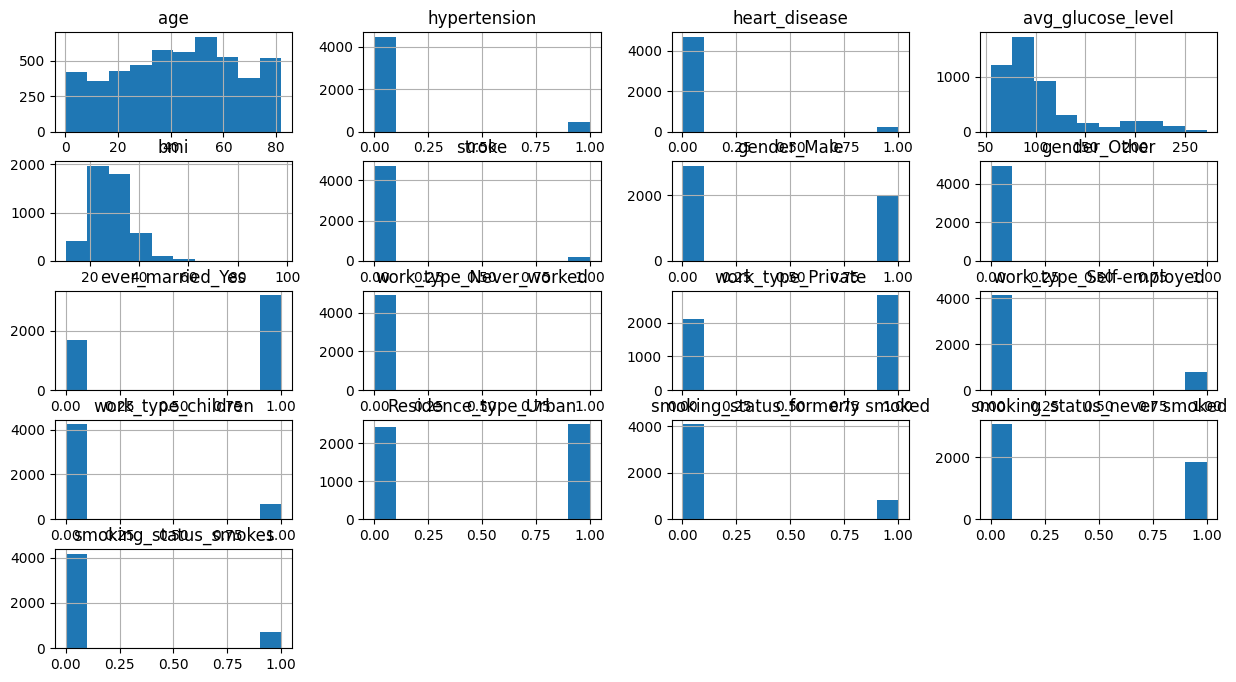

In [9]:
inputdata.hist(figsize=(15,8))

Correlation Analysis

<Axes: >

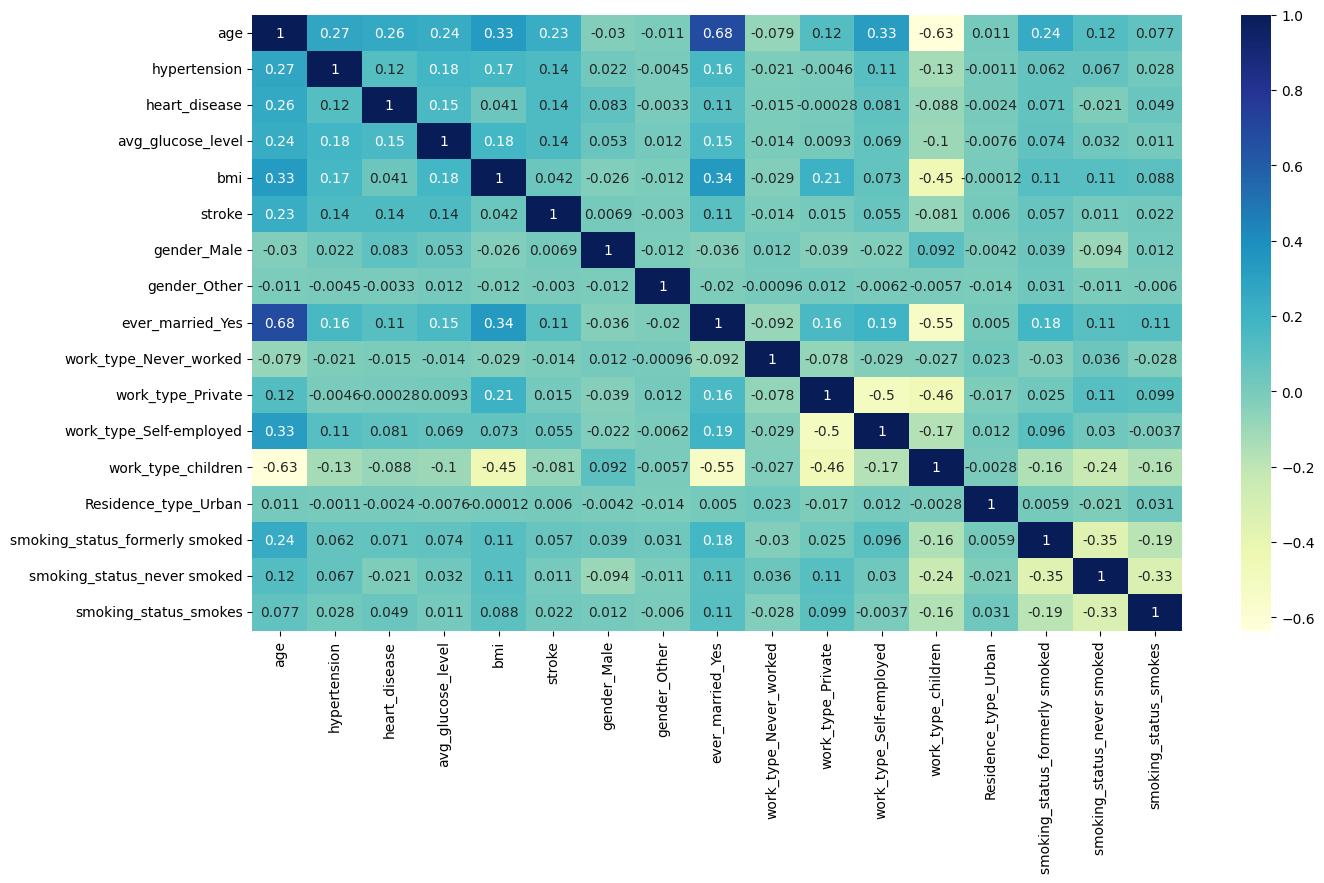

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(inputdata.corr(),annot=True,cmap="YlGnBu")

Train Test Split

In [12]:
X=inputdata.drop(columns=["stroke"])
y=inputdata["stroke"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
X_train.count()

age                               3927
hypertension                      3927
heart_disease                     3927
avg_glucose_level                 3927
bmi                               3927
gender_Male                       3927
gender_Other                      3927
ever_married_Yes                  3927
work_type_Never_worked            3927
work_type_Private                 3927
work_type_Self-employed           3927
work_type_children                3927
Residence_type_Urban              3927
smoking_status_formerly smoked    3927
smoking_status_never smoked       3927
smoking_status_smokes             3927
dtype: int64

Scaling Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [33]:
#checkimg number of columns
len(X_train_scaled[0])

16

Creating ANN model for prediction of stroke

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model=Sequential()
model.add(Dense(7,activation="sigmoid",input_dim=16))
model.add(Dense(3,activation="sigmoid",input_dim=7))
model.add(Dense(2,activation="sigmoid",input_dim=3))
model.add(Dense(1,activation="sigmoid"))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
 dense_5 (Dense)             (None, 3)                 24        
                                                                 
 dense_6 (Dense)             (None, 2)                 8         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Compilig and training Model
model.compile(loss="binary_crossentropy",optimizer="Adam")
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
123/123 [==============================] - 2s 3ms/step - loss: 0.5502
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.4477
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.3754
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.2248
Epoch 8/10
123/123 [==============================] - 0s 2ms/step - loss: 0.2061
Epoch 9/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1932
Epoch 10/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1846


In [38]:
y_out=model.predict(X_test_scaled)

31/31 [==============================] - 0s 2ms/step


In [39]:
y_out

array([[0.08050107],
       [0.08058968],
       [0.07976034],
       [0.07978145],
       [0.08018891],
       [0.08567677],
       [0.0797115 ],
       [0.08005951],
       [0.08232019],
       [0.07999343],
       [0.08160327],
       [0.07990817],
       [0.08000091],
       [0.08027748],
       [0.08084741],
       [0.07972455],
       [0.07982922],
       [0.08013362],
       [0.08007145],
       [0.08096027],
       [0.079795  ],
       [0.07979119],
       [0.08104034],
       [0.07968324],
       [0.08262521],
       [0.08081716],
       [0.08067898],
       [0.08446119],
       [0.08043732],
       [0.07994544],
       [0.08036626],
       [0.08072252],
       [0.08044268],
       [0.0796495 ],
       [0.07985069],
       [0.07982872],
       [0.08071719],
       [0.08030649],
       [0.07970185],
       [0.08020291],
       [0.07989296],
       [0.08051216],
       [0.08042473],
       [0.07975506],
       [0.07990274],
       [0.08221943],
       [0.08009107],
       [0.079

In [40]:
#Since sigmoid function has been used, therefore values lie between 0 and 1
# Considering value above 0.5 is 1 and below 0.5 is 0

y_pred=np.where(y_out>0.5,1,0)

In [41]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Calculating Accuracy of the model

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9480651731160896

Accuracy of the model is 94%